# Minimal example with TesorFlow 2.0
in this example we will recreate our previous machine learning algorithm this time with TF 2.0

### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data Generation

In [2]:
observations = 1000

xs = np.random.uniform(-10, 10, (observations, 1))
xz = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs, xz))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*xz + 5 + noise

# no.saves ('file name', labels = arrays)
np.savez('10-minimal example using tensor flow', inputs = generated_inputs, targets = generated_targets)

### Solving with tensorflow

In [3]:
# load the tesorflow shaped data
training_data = np.load('10-minimal example using tensor flow.npz')

In [4]:
# declare two variables that meaure the sizes of our inputs and outputs
input_size = 2   # x and z
output_size = 1  # y

<font color='red'> Unlike other packages where we had built-in models, in tensorflow we need to build or own model

In [5]:
# lets build our model
# as TF2 is based on keras, so we need this module to build a model 
# Sequential is the function that specifies how the model will be laid down. sequential('stacks layer')
# linear combination + output = Layer
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)    
                            ])
# tf.keras.layers.Dense(output_size) : y=wx+b : output = np.dot(inputs, weights) + bias

model.compile(optimizer = 'sgd', loss = 'mean_squared_error' )
# sgd : Stochastic gradient descent    mean_squared_error = sum of squared error / number of observation : similar to what 
# we did in previous example

# feeding the model with our data
# model.fit(input tensor, output tensor, number of iterations, verbose = 2 )
# verbose = 0 : silent or do not display output, verbose = 1 or 2 : show the output , 4, ....
model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 25.3969
Epoch 2/100
1000/1000 - 0s - loss: 4.4221
Epoch 3/100
1000/1000 - 0s - loss: 1.5016
Epoch 4/100
1000/1000 - 0s - loss: 0.6578
Epoch 5/100
1000/1000 - 0s - loss: 0.4396
Epoch 6/100
1000/1000 - 0s - loss: 0.3743
Epoch 7/100
1000/1000 - 0s - loss: 0.3576
Epoch 8/100
1000/1000 - 0s - loss: 0.3707
Epoch 9/100
1000/1000 - 0s - loss: 0.3521
Epoch 10/100
1000/1000 - 0s - loss: 0.3547
Epoch 11/100
1000/1000 - 0s - loss: 0.3526
Epoch 12/100
1000/1000 - 0s - loss: 0.3497
Epoch 13/100
1000/1000 - 0s - loss: 0.3490
Epoch 14/100
1000/1000 - 0s - loss: 0.3514
Epoch 15/100
1000/1000 - 0s - loss: 0.3570
Epoch 16/100
1000/1000 - 0s - loss: 0.3505
Epoch 17/100
1000/1000 - 0s - loss: 0.3527
Epoch 18/100
1000/1000 - 0s - loss: 0.3597
Epoch 19/100
1000/1000 - 0s - loss: 0.3548
Epoch 20/100
1000/1000 - 0s - loss: 0.3482
Epoch 21/100
1000/1000 - 0s - loss: 0.3603
Epoch 22/100
1000/1000 - 0s - loss: 0.3590
Epoch 23/100
1000/1000 - 0s - loss: 0.36

###  Extract the weights and bias

In [6]:
# in this example we have only one layer which is placed in position 0
# we get the witght for our first layer
model.layers[0].get_weights()

[array([[ 2.026068 ],
        [-2.9723423]], dtype=float32),
 array([4.9814534], dtype=float32)]

In [7]:
# using thier index we can seperate them since the whole model.layers[0].get_weights() is a list
model.layers[0].get_weights()[0]

array([[ 2.026068 ],
       [-2.9723423]], dtype=float32)

In [8]:
model.layers[0].get_weights()[1]

array([4.9814534], dtype=float32)

###  Extract the outputs (make predictions)

In [9]:
# to get output from the model we give it input
# the batch is the data that we provided with
model.predict_on_batch(training_data['inputs'])

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[-3.31164703e+01],
       [-2.21878242e+01],
       [-2.60608816e+00],
       [ 8.20671749e+00],
       [-2.85723114e+01],
       [ 1.33515406e+00],
       [-8.88791084e-02],
       [-1.93374710e+01],
       [ 3.19486761e+00],
       [ 2.82448025e+01],
       [ 2.87080612e+01],
       [-2.64554863e+01],
       [-2.72216177e+00],
       [ 3.89816246e+01],
       [ 1.17367172e+01],
       [ 5.57507038e+00],
       [-8.80468369e+00],
       [ 6.99442053e+00],
       [ 1.11338577e+01],
       [ 7.84597254e+00],
       [ 6.32560730e-01],
       [-2.79204369e+01],
       [ 1.29088068e+01],
       [ 1.66395245e+01],
       [ 2.98818111e+01],
       [ 2.49604249e+00],
       [-7.97793436e+00],
       [-2.82367325e+01],
       [-1.18207302e+01],
       [ 2.82342434e+01],
       [ 5.32742453e+00],
       [ 2.40673180e+01],
       [ 2.97318172e+01],
       [ 1.60066605e+01],
       [ 2.02408390e+01],
       [ 1.72629642e+00],
       [-1.13

In [10]:
# to make ir more readable we round it
np.around(model.predict_on_batch(training_data['inputs']), 1)

array([[-33.1],
       [-22.2],
       [ -2.6],
       [  8.2],
       [-28.6],
       [  1.3],
       [ -0.1],
       [-19.3],
       [  3.2],
       [ 28.2],
       [ 28.7],
       [-26.5],
       [ -2.7],
       [ 39. ],
       [ 11.7],
       [  5.6],
       [ -8.8],
       [  7. ],
       [ 11.1],
       [  7.8],
       [  0.6],
       [-27.9],
       [ 12.9],
       [ 16.6],
       [ 29.9],
       [  2.5],
       [ -8. ],
       [-28.2],
       [-11.8],
       [ 28.2],
       [  5.3],
       [ 24.1],
       [ 29.7],
       [ 16. ],
       [ 20.2],
       [  1.7],
       [-11.3],
       [ -1.8],
       [  7.8],
       [-15.2],
       [ 28. ],
       [  2.6],
       [  5.5],
       [ -6.8],
       [-18.8],
       [ 13.1],
       [ -3.9],
       [-29.1],
       [ 20.1],
       [  5.9],
       [-18. ],
       [ 39.1],
       [-21.4],
       [-29.4],
       [ 22.7],
       [ -9.7],
       [-22.2],
       [ 11.2],
       [-13. ],
       [-38.3],
       [ 19.2],
       [-20.6],
       [

In [11]:
np.around(training_data['targets'], 1)

array([[-32.3],
       [-22.1],
       [ -2.3],
       [  7.6],
       [-28.2],
       [  1.5],
       [  0.6],
       [-20.3],
       [  3.9],
       [ 28.1],
       [ 29.6],
       [-27. ],
       [ -2. ],
       [ 39. ],
       [ 11.6],
       [  5. ],
       [ -9.6],
       [  7. ],
       [ 11.5],
       [  6.8],
       [  0.8],
       [-28. ],
       [ 12.9],
       [ 17.1],
       [ 29.8],
       [  1.8],
       [ -8. ],
       [-29. ],
       [-12.6],
       [ 29.2],
       [  4.4],
       [ 23.9],
       [ 29.3],
       [ 16.3],
       [ 20.8],
       [  2.6],
       [-11.6],
       [ -1.1],
       [  7.5],
       [-14.1],
       [ 27.2],
       [  2.5],
       [  4.9],
       [ -6.7],
       [-19.3],
       [ 13.8],
       [ -3.1],
       [-29.6],
       [ 19.6],
       [  7.1],
       [-17.4],
       [ 39.7],
       [-21.5],
       [-29.1],
       [ 21.9],
       [-10. ],
       [-22.2],
       [ 10.4],
       [-14.3],
       [-38.5],
       [ 20. ],
       [-21.5],
       [

### Plot the data

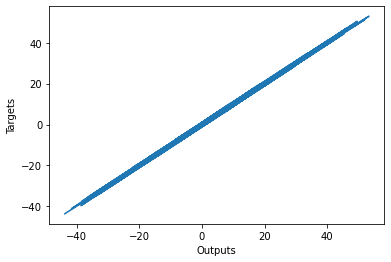

In [12]:
# in order to check the accuracy of our model we plot and investigate if there is a 45 degree line
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()

In [13]:
# the above model was the first machine learning with tensorflow,  we can not call the above model deep learning yet, 
# but we got acquainted with the packahe.  

### Customizing the modal 
As we saw in the minimal example model using numpy, we had to initilize some of our values at the beginning of our optimization algorithm. weights (coefficients and biases) and also learning rate are the values that need to be initilized. in this part we see how to add this initilizations to customize our model. 

In [20]:
# lets build our model
# as TF2 is based on keras, so we need this module to build a model 
# Sequential is the function that specifies how the model will be laid down. sequential('stacks layer')
# linear combination + output = Layer
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size, 
                                                  kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))    
                            ])
# tf.keras.layers.Dense(output_size) : y=wx+b : output = np.dot(inputs, weights) + bias
# tf.keras.layers.Dense(output_size, kernel_initializer, bias_initilizer)

# instead of 'sgd' as our optimizer we customize our optimizer which is an customized version of our sgd
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

#we put our custom_optimizer instead of 'sgd'
model.compile(optimizer = custom_optimizer , loss = 'mean_squared_error' )
# sgd : Stochastic gradient descent    mean_squared_error = sum of squared error / number of observation : similar to what 
# we did in previous example
# if we had a lot of out liers we could have used 'huber_loss' as our loss function instead of 'mean_squared_error'

# feeding the model with our data
# model.fit(input tensor, output tensor, number of iterations, verbose = 2 )
# verbose = 0 : silent or do not display output, verbose = 1 or 2 : show the output , 4, ....
model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 41.2068
Epoch 2/100
1000/1000 - 0s - loss: 1.2247
Epoch 3/100
1000/1000 - 0s - loss: 0.4265
Epoch 4/100
1000/1000 - 0s - loss: 0.3863
Epoch 5/100
1000/1000 - 0s - loss: 0.3821
Epoch 6/100
1000/1000 - 0s - loss: 0.3964
Epoch 7/100
1000/1000 - 0s - loss: 0.4041
Epoch 8/100
1000/1000 - 0s - loss: 0.3756
Epoch 9/100
1000/1000 - 0s - loss: 0.3925
Epoch 10/100
1000/1000 - 0s - loss: 0.3929
Epoch 11/100
1000/1000 - 0s - loss: 0.3879
Epoch 12/100
1000/1000 - 0s - loss: 0.4276
Epoch 13/100
1000/1000 - 0s - loss: 0.3683
Epoch 14/100
1000/1000 - 0s - loss: 0.3828
Epoch 15/100
1000/1000 - 0s - loss: 0.4075
Epoch 16/100
1000/1000 - 0s - loss: 0.4108
Epoch 17/100
1000/1000 - 0s - loss: 0.4006
Epoch 18/100
1000/1000 - 0s - loss: 0.4152
Epoch 19/100
1000/1000 - 0s - loss: 0.4119
Epoch 20/100
1000/1000 - 0s - loss: 0.3683
Epoch 21/100
1000/1000 - 0s - loss: 0.4215
Epoch 22/100
1000/1000 - 0s - loss: 0.4077
Epoch 23/100
1000/1000 - 0s - loss: 0.40

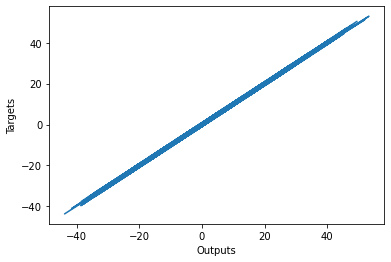

In [18]:
# in order to check the accuracy of our model we plot and investigate if there is a 45 degree line
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()